<a href="https://colab.research.google.com/github/vedasri2511/ML_153/blob/main/ML_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Assignment-1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

In [ ]:
df=pd.read_csv('/content/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
X=df.iloc[:,:-1]
# Convert the continuous 'z' variable into a binary target variable based on the median
y = (df['z'] > df['z'].median()).astype(int)

In [ ]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessing
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ],
    remainder='passthrough' # Keep other columns (if any)
)
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(x_test)

In [ ]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss_L2(X, y, w, lam):
    N = X.shape[0]
    y_hat = sigmoid(X @ w)
    loss = - (1/N) * np.sum(y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9))
    reg = (lam/2) * np.sum(w**2)
    return loss + reg
w = np.zeros(X_train_trans.shape[1])
lam = 1.0
loss_value = logistic_loss_L2(X_train_trans, y_train.values, w, lam)
print("Logistic Loss with L2 Regularization:", loss_value)

Logistic Loss with L2 Regularization: 0.6931471785599451


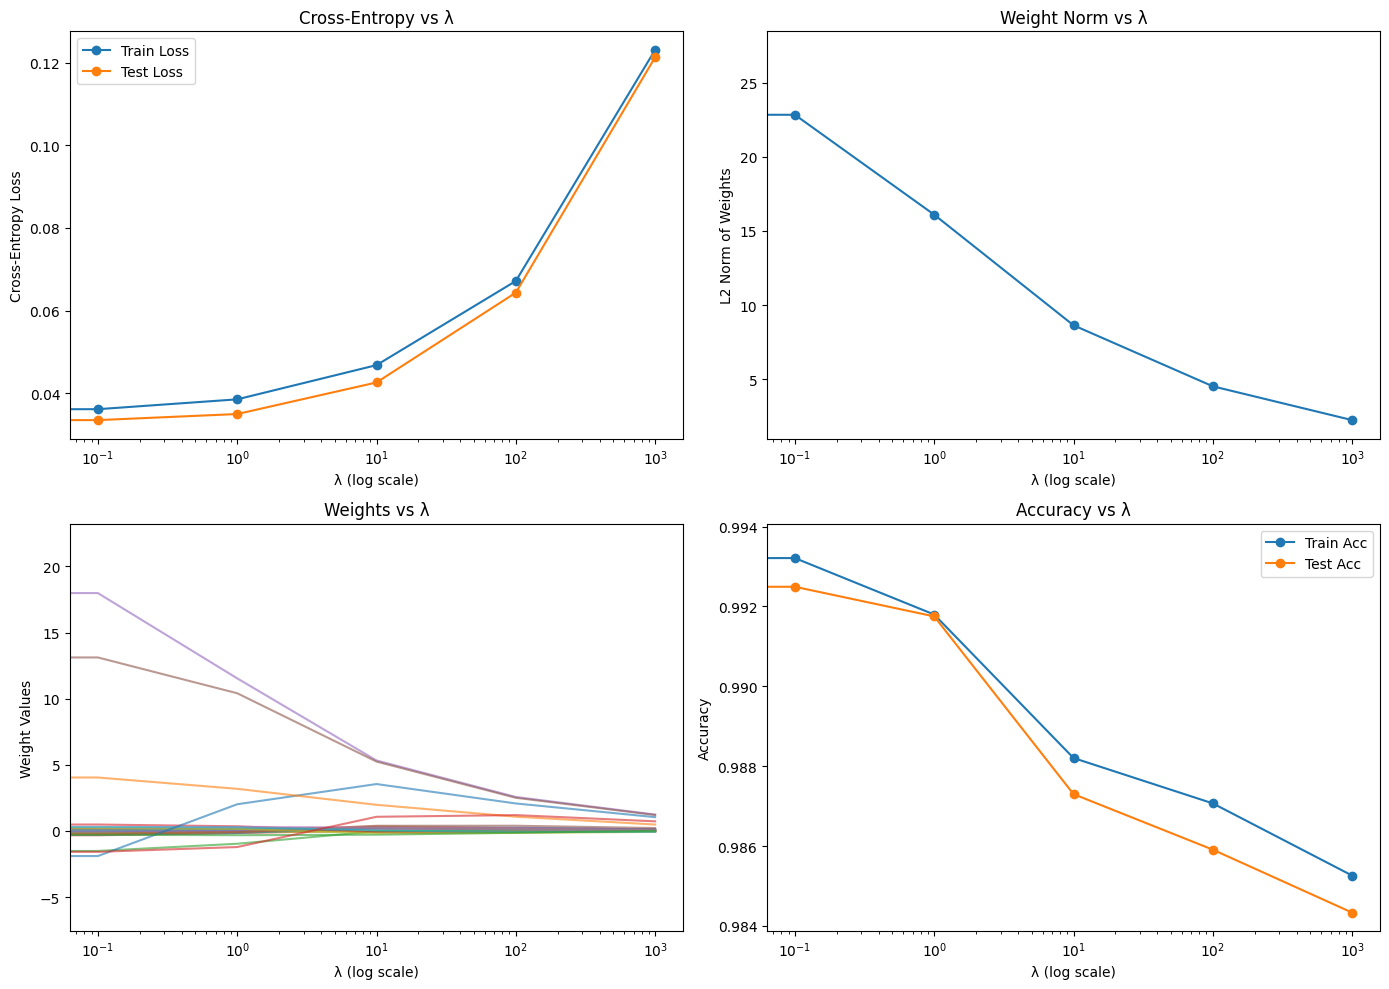

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt

lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses, test_losses, weight_norms, train_accs, test_accs, weights = [], [], [], [], [], []

for lam in lambdas:
    C = 1/lam if lam > 0 else 1e6
    model = LogisticRegression(penalty="l2", C=C, solver="liblinear", max_iter=1000)
    model.fit(X_train_trans, y_train)


    y_train_prob = model.predict_proba(X_train_trans)[:,1]
    y_test_prob = model.predict_proba(X_test_trans)[:,1]


    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))


    weight_norms.append(np.linalg.norm(model.coef_))


    train_accs.append(accuracy_score(y_train, model.predict(X_train_trans)))
    test_accs.append(accuracy_score(y_test, model.predict(X_test_trans)))


    weights.append(model.coef_[0])


plt.figure(figsize=(14,10))

# 1. Cross-entropy
plt.subplot(2,2,1)
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()

# 2. L2 norm of weight vector
plt.subplot(2,2,2)
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs λ")

# 3. Actual weight values
plt.subplot(2,2,3)
for j in range(len(weights[0])):
    plt.plot(lambdas, [w[j] for w in weights], alpha=0.6)
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight Values")
plt.title("Weights vs λ")

# 4. Accuracy
plt.subplot(2,2,4)
plt.plot(lambdas, train_accs, marker='o', label="Train Acc")
plt.plot(lambdas, test_accs, marker='o', label="Test Acc")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def gaussian_basis(x, mu, sigma):
    return np.exp(- (x - mu)**2 / (2 * sigma**2))


mus = np.linspace(-10, 10, 5)

sigmas = [0.1, 0.5, 1, 5, 10]

def transform_with_gaussian_basis(X, sigma):
    X_new = []
    for col in range(X.shape[1]):
        for mu in mus:
            X_new.append(gaussian_basis(X[:, col], mu, sigma))
    return np.array(X_new).T

X_train_basis = transform_with_gaussian_basis(X_train_trans.toarray() if hasattr(X_train_trans, "toarray") else X_train_trans, sigma=1)
X_test_basis = transform_with_gaussian_basis(X_test_trans.toarray() if hasattr(X_test_trans, "toarray") else X_test_trans, sigma=1)

print("Original shape:", X_train_trans.shape)
print("After Gaussian basis transform:", X_train_basis.shape)


Original shape: (43152, 26)
After Gaussian basis transform: (43152, 130)


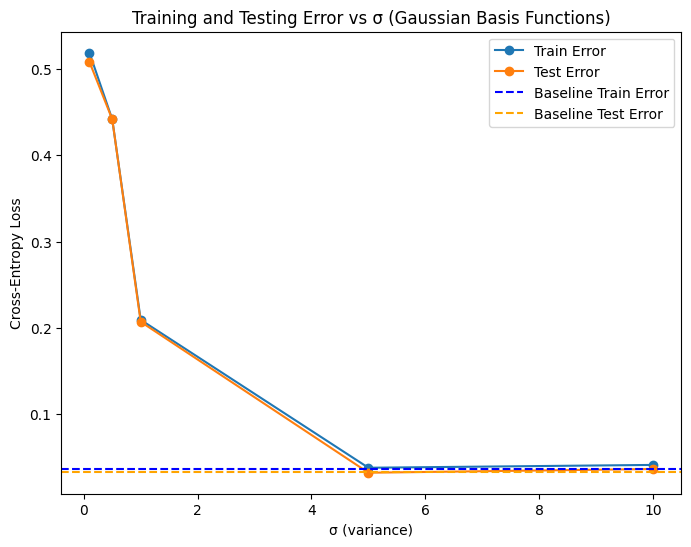

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

def gaussian_basis(x, mu, sigma):
    return np.exp(- (x - mu)**2 / (2 * sigma**2))


mus = np.linspace(-10, 10, 5)


def transform_with_gaussian_basis(X, sigma):
    X_new = []
    for col in range(X.shape[1]):
        for mu in mus:
            X_new.append(gaussian_basis(X[:, col], mu, sigma))
    return np.array(X_new).T


sigmas = [0.1, 0.5, 1, 5, 10]
train_errors, test_errors = [], []


for sigma in sigmas:
    X_train_basis = transform_with_gaussian_basis(
        X_train_trans.toarray() if hasattr(X_train_trans, "toarray") else X_train_trans, sigma
    )
    X_test_basis = transform_with_gaussian_basis(
        X_test_trans.toarray() if hasattr(X_test_trans, "toarray") else X_test_trans, sigma
    )

    model = LogisticRegression(penalty=None, max_iter=1000)
    model.fit(X_train_basis, y_train)

    y_train_prob = model.predict_proba(X_train_basis)[:,1]
    y_test_prob = model.predict_proba(X_test_basis)[:,1]


    train_errors.append(log_loss(y_train, y_train_prob))
    test_errors.append(log_loss(y_test, y_test_prob))


baseline_model = LogisticRegression(penalty=None, max_iter=1000)
baseline_model.fit(X_train_trans, y_train)
baseline_train_err = log_loss(y_train, baseline_model.predict_proba(X_train_trans)[:,1])
baseline_test_err = log_loss(y_test, baseline_model.predict_proba(X_test_trans)[:,1])

plt.figure(figsize=(8,6))
plt.plot(sigmas, train_errors, marker='o', label="Train Error")
plt.plot(sigmas, test_errors, marker='o', label="Test Error")
plt.axhline(y=baseline_train_err, color='blue', linestyle='--', label="Baseline Train Error")
plt.axhline(y=baseline_test_err, color='orange', linestyle='--', label="Baseline Test Error")
plt.xlabel("σ (variance)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training and Testing Error vs σ (Gaussian Basis Functions)")
plt.legend()
plt.show()


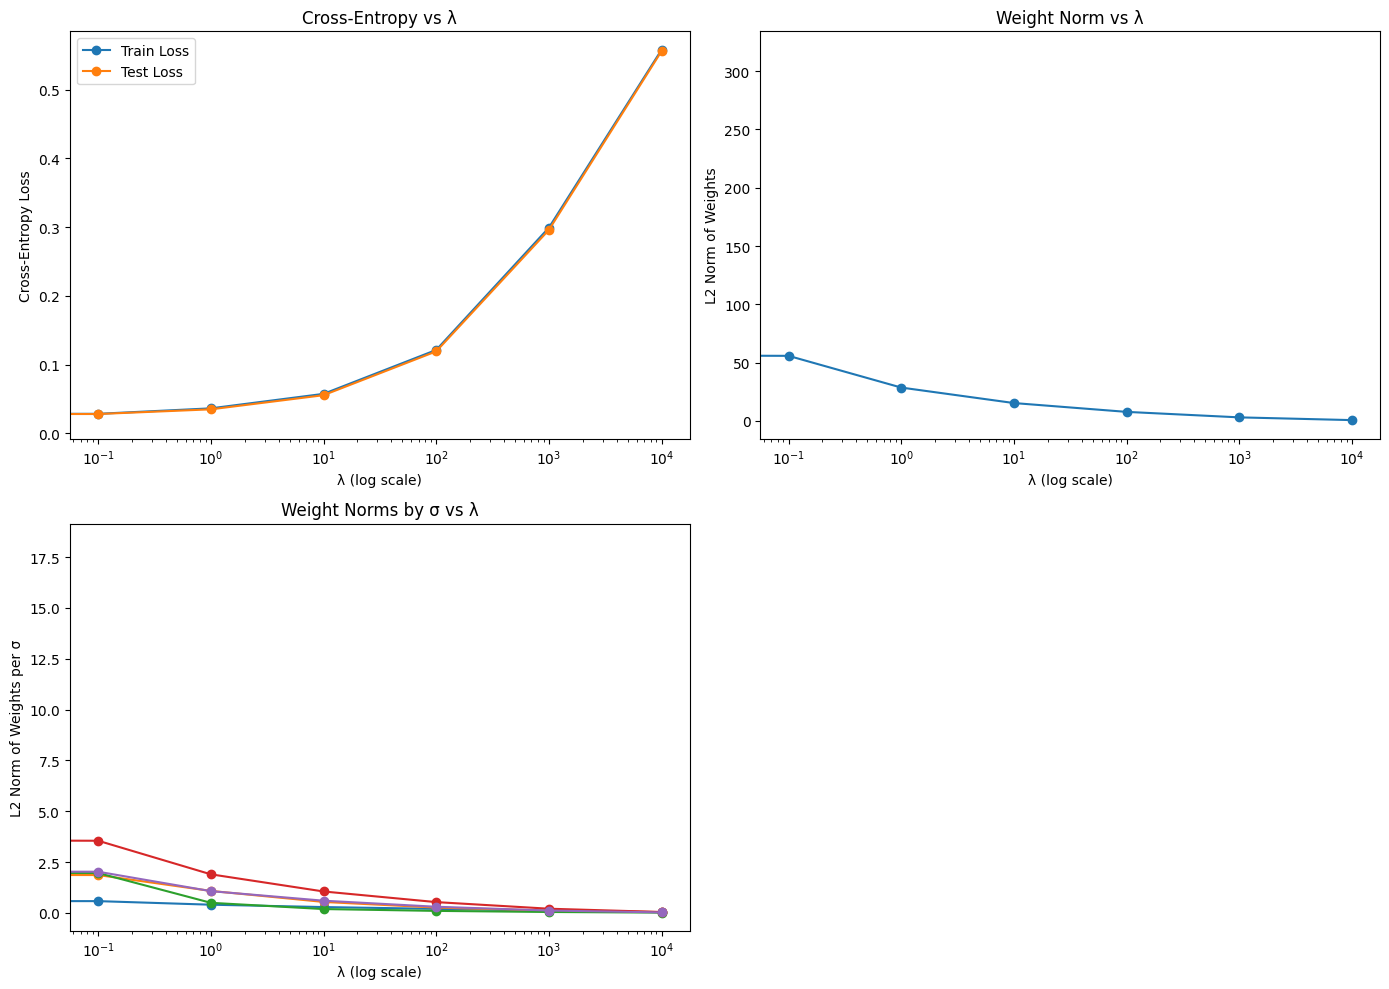

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np

def gaussian_basis(x, mu, sigma):
    return np.exp(- (x - mu)**2 / (2 * sigma**2))

mus = np.linspace(-10, 10, 5)

def transform_all_sigmas(X, sigmas):
    X_new, sigma_group = [], []
    for col in range(X.shape[1]):
        for sigma in sigmas:
            for mu in mus:
                X_new.append(gaussian_basis(X[:, col], mu, sigma))
                sigma_group.append(sigma)
    return np.array(X_new).T, sigma_group

sigmas = [0.1, 0.5, 1, 5, 10]
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

X_train_all, sigma_group = transform_all_sigmas(
    X_train_trans if not hasattr(X_train_trans, "toarray") else X_train_trans.toarray(), sigmas
)
X_test_all, _ = transform_all_sigmas(
    X_test_trans if not hasattr(X_test_trans, "toarray") else X_test_trans.toarray(), sigmas
)

train_losses, test_losses, norms = [], [], []
sigma_norms = {s: [] for s in sigmas}

for lam in lambdas:
    C = 1/lam if lam > 0 else 1e6
    model = LogisticRegression(penalty="l2", C=C, solver="liblinear", max_iter=2000)
    model.fit(X_train_all, y_train)

    y_train_prob = model.predict_proba(X_train_all)[:,1]
    y_test_prob = model.predict_proba(X_test_all)[:,1]

    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))

    coef = model.coef_[0]
    norms.append(np.linalg.norm(coef))

    start = 0

    current_sigma_norms = {s: [] for s in sigmas}
    for col in range(X_train_trans.shape[1]):
        for s in sigmas:
            group_size = len(mus)
            group_weights = coef[start:start+group_size]
            current_sigma_norms[s].append(np.linalg.norm(group_weights))
            start += group_size

    for s in sigmas:
        sigma_norms[s].append(np.mean(current_sigma_norms[s]))


plt.figure(figsize=(14,10))

# 1. Cross-entropy
plt.subplot(2,2,1)
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()

# 2. L2 norm of all weights
plt.subplot(2,2,2)
plt.plot(lambdas, norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs λ")

# 3. L2 norm of weights per sigma
plt.subplot(2,2,3)
for s in sigmas:
    plt.plot(lambdas, sigma_norms[s], marker='o', label=f"σ={s}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights per σ")
plt.title("Weight Norms by σ vs λ")
plt.tight_layout()
plt.show()


If we want to design Gaussian basis functions that capture **relationships between inputs**, we need to move beyond univariate Gaussians (applied to each feature individually) and use **multivariate Gaussian basis functions** that operate on combinations of features. A multivariate Gaussian is defined as

$$
\phi(x) = \exp\Big(-\frac{1}{2}(x - \mu)^T \Sigma^{-1}(x - \mu)\Big),
$$

where $x$ is the full feature vector, $\mu$ is the center of the Gaussian in input space, and $\Sigma$ is the covariance matrix controlling its spread and orientation. This allows the basis functions to model **interactions between features** (e.g., how two or more inputs jointly affect the output). The impact on the bias–variance trade-off is that bias decreases (the model becomes more flexible and expressive) but variance increases (the model is more prone to overfitting because of the larger number of parameters and complexity). In practice, this means multivariate Gaussian basis functions can lead to better performance on complex datasets if enough data and proper regularization are available, but they may overfit when data is limited.


Initializing centers with KMeans...
Iteration 10/50, Objective: 0.0711
Iteration 20/50, Objective: 0.0711
Iteration 30/50, Objective: 0.0711
Iteration 40/50, Objective: 0.0711
Iteration 50/50, Objective: 0.0711
Train MSE: 0.049103383805349204
Test MSE: 0.04944569709829198
Train R^2: 0.8035410625039585
Test R^2: 0.802128828280171


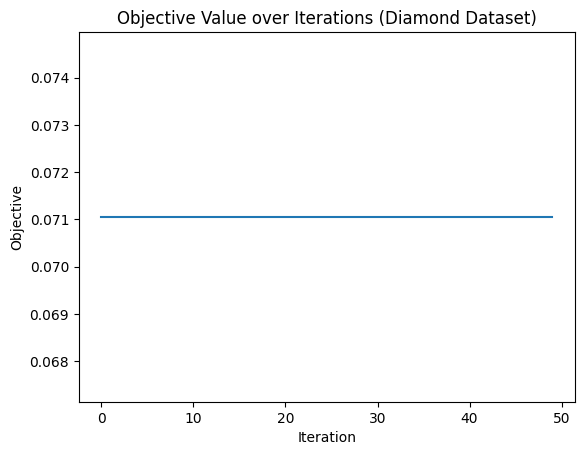

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

w_bias, mus, history = learn_rbf_centers_and_weights(
    X_train, y_train,
    M=20,
    sigma=1.0,
    lam=1e-3,
    mu_lr=0.01,
    max_iters=50,
    mu_init='kmeans',
    verbose=True
)

Phi_train = rbf_phi(X_train, mus, sigma=1.0)
Phi_test = rbf_phi(X_test, mus, sigma=1.0)

Phi_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), Phi_train])
Phi_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), Phi_test])

y_pred_train = Phi_train_bias @ w_bias
y_pred_test = Phi_test_bias @ w_bias

print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R^2:", r2_score(y_train, y_pred_train))
print("Test R^2:", r2_score(y_test, y_pred_test))

plt.plot(history['obj'])
plt.title("Objective Value over Iterations (Diamond Dataset)")
plt.xlabel("Iteration")
plt.ylabel("Objective")
plt.show()

plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Diamond Prices (Test Set)")
plt.show()


**Convergence and optimality**

The alternating algorithm (closed-form solve for **w** and gradient steps for the centers **µ**) typically **converges** in practice to a stationary point: because we compute the best possible **w** for the current centers (closed form) and then take gradient steps on **µ**, the objective (squared loss + λ‖w‖²) will often *decrease* and settle. However, the problem is **non-convex** in the joint variables \((w,\mu)\), so the algorithm is **not guaranteed to find the global optimum**. Instead it generally finds a **local minimum** (or other stationary point) whose quality depends strongly on initialization (KMeans helps), the learning rate for µ, the number of centers, σ, and regularization λ.

**Practical implications / tips**
- Use good initialization (KMeans or multiple random restarts) to improve chances of a better local minimum.  
- Use a small µ learning rate or use an adaptive optimizer; check that objective decreases after µ updates.  
- Regularization (larger λ) smooths the objective and can reduce bad overfitting local minima.  
- Monitor objective value and `mu_change`; stop when changes are tiny.  
- If you need global guarantees, consider convex alternatives (e.g., fixed basis with convex w-solve) or global optimization methods — but those are expensive.

To summarize, the algorithm usually **converges to a local optimum** (stationary point), not necessarily the global optimum; initialization, hyperparameters, and regularization determine the final solution quality.


      Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions.

         Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-n

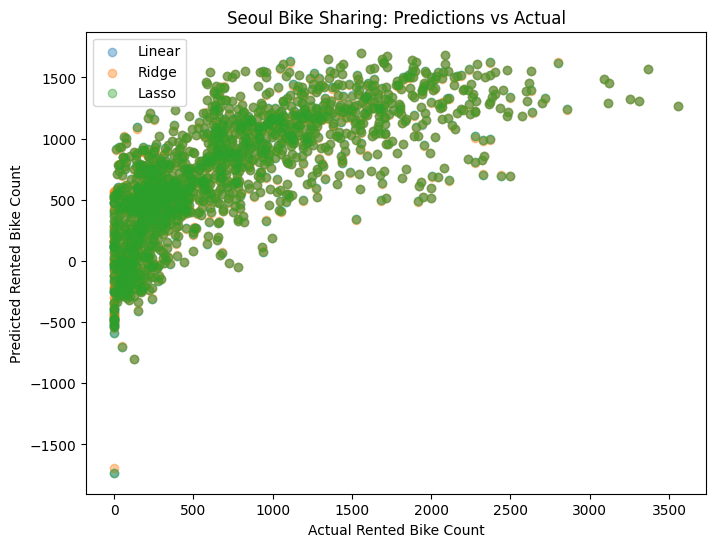

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/SeoulBikeData.csv", encoding="ISO-8859-1")


print(df.head())
print(df.info())

y = df["Rented Bike Count"]
X = df.drop(columns=["Rented Bike Count", "Date"])
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.01, max_iter=5000)
}

results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mse, r2)
    print(f"{name} Regression → Test MSE: {mse:.2f}, R²: {r2:.3f}")


plt.figure(figsize=(8,6))
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.4, label=name)
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Predicted Rented Bike Count")
plt.legend()
plt.title("Seoul Bike Sharing: Predictions vs Actual")
plt.show()


logistic regression (CLASSIFICATION)

Accuracy: 0.865296803652968

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       876
           1       0.86      0.87      0.87       876

    accuracy                           0.87      1752
   macro avg       0.87      0.87      0.87      1752
weighted avg       0.87      0.87      0.87      1752



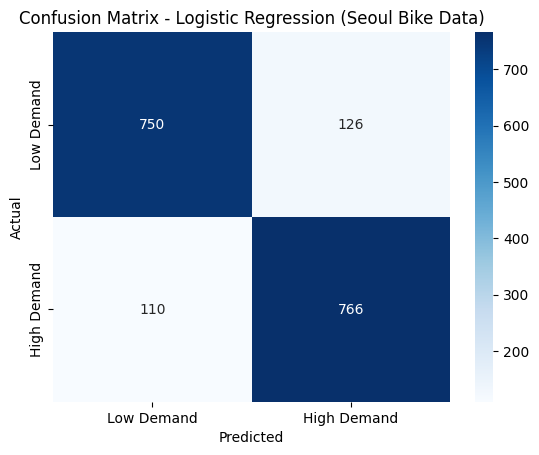

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/content/SeoulBikeData.csv", encoding="ISO-8859-1")


median_count = df["Rented Bike Count"].median()
df["HighDemand"] = (df["Rented Bike Count"] > median_count).astype(int)

y = df["HighDemand"]
X = df.drop(columns=["Rented Bike Count", "Date", "HighDemand"])

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


logreg_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, solver="liblinear"))
])

logreg_pipe.fit(X_train, y_train)

y_pred = logreg_pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Demand","High Demand"], yticklabels=["Low Demand","High Demand"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Seoul Bike Data)")
plt.show()
